# scHPF Analysis on Basal subset cells

This notebook must be run using the conda env *schpf_env* as kernel.

## Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import schpf
%matplotlib inline
from scipy.io import mmread
import seaborn as sns
import anndata as ad
import hdf5plugin
import joblib
import scipy.sparse as sp
from matplotlib.patches import Patch
from scipy.stats import ttest_ind
import plotnine
import matplotlib as mpl

## Plotting config

In [3]:
# Set font types to ensure text is editable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42   # For PDF export
mpl.rcParams['ps.fonttype'] = 42    # For PS export
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.dpi'] = 600
# Fine-tune Matplotlib settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['figure.subplot.wspace'] = 0.99
plt.rcParams['axes.grid'] = False

## Building AnnData and Loom

### Cell metadata

In [4]:
cell_meta = pd.read_csv('./../data/Basal_metadata.csv')
obs_cells = pd.read_csv('./../data/Basal_obs_cells.tsv', sep= '\t', header= None, names= ['Cell ID'])
cell_meta.set_index(obs_cells['Cell ID'], inplace= True)
cell_meta

,Sample ID,Media,Time point,Patient ID,Passage,Gestational Week,cluster,CELL_TYPE
Cell ID,,,,,,,,
s003.1,s003,Standard,day0-std,124e,P4,week_14,5,Basal
s003.3,s003,Standard,day0-std,124e,P4,week_14,5,Basal
s003.4,s003,Standard,day0-std,124e,P4,week_14,0,Basal
s003.5,s003,Standard,day0-std,124e,P4,week_14,0,Basal
s003.8,s003,Standard,day0-std,124e,P4,week_14,0,Basal
...,...,...,...,...,...,...,...,...
s001.284,s001,NE Expansion,day0,125e,P6,week_17,0,Basal
s001.286,s001,NE Expansion,day0,125e,P6,week_17,0,Basal
s001.287,s001,NE Expansion,day0,125e,P6,week_17,5,Basal


### Gene names

In [5]:
# Load gene names
with open('./../data/Basal_var_genes.tsv', 'r') as f:
    gene_names = f.read().splitlines()
gene_names

['ENSG00000238009',
 'ENSG00000268903',
 'ENSG00000241860',
 'ENSG00000228463',
 'ENSG00000290385',
 'ENSG00000230021',
 'MTND1P23',
 'MTND2P28',
 'MTCO1P12',
 'ENSG00000278791',
 'MTCO2P12',
 'MTATP8P1',
 'MTATP6P1',
 'MTCO3P12',
 'ENSG00000291215',
 'LINC01409',
 'LINC00115',
 'LINC01128',
 'FAM41C',
 'ENSG00000230699',
 'SAMD11',
 'NOC2L',
 'KLHL17',
 'PLEKHN1',
 'ENSG00000272512',
 'HES4',
 'ISG15',
 'AGRN',
 'ENSG00000291156',
 'RNF223',
 'C1orf159',
 'LINC01342',
 'ENSG00000272141',
 'TTLL10',
 'SDF4',
 'B3GALT6',
 'C1QTNF12',
 'UBE2J2',
 'SCNN1D',
 'ACAP3',
 'PUSL1',
 'INTS11',
 'CPTP',
 'TAS1R3',
 'DVL1',
 'AURKAIP1',
 'CCNL2',
 'MRPL20-AS1',
 'MRPL20',
 'MRPL20-DT',
 'ANKRD65',
 'TMEM88B',
 'LINC01770',
 'VWA1',
 'ATAD3C',
 'ATAD3B',
 'ATAD3A',
 'TMEM240',
 'SSU72',
 'ENSG00000215014',
 'FNDC10',
 'ENSG00000272106',
 'MIB2',
 'MMP23B',
 'CDK11B',
 'ENSG00000272004',
 'SLC35E2B',
 'CDK11A',
 'ENSG00000268575',
 'ENSG00000227775',
 'ENSG00000290854',
 'NADK',
 'GNB1',
 'CALML6',

### Raw counts

In [6]:
raw_counts = mmread('./../data/Basal_matrix.mtx').tocsr()
raw_counts.data

array([ 2., 23.,  1., ..., 41.,  1., 81.])

### Building AnnData

In [7]:
# We set all previously extracted data to the anndata object
adata = ad.AnnData(
    X= raw_counts,
    obs= cell_meta,
)
adata.var_names = gene_names
adata.var['Gene'] = adata.var_names
adata.raw = adata.copy()
adata.write_h5ad(
    './../data/Basal.h5ad',
    compression= hdf5plugin.FILTERS["zstd"],
    compression_opts= hdf5plugin.Zstd(clevel=5).filter_options
)
adata

/home/villicana/.conda/envs/schpf/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


AnnData object with n_obs × n_vars = 717 × 20920
    obs: 'Sample ID', 'Media', 'Time point', 'Patient ID', 'Passage', 'Gestational Week', 'cluster', 'CELL_TYPE'
    var: 'Gene'

### Building Loom

In [ ]:
adata.write_loom('./../data/Basal_RawMatrix_09012026.loom',
                 write_obsm_varm=True)

### Number of test cells per subset
In our models, we inputted the full corresponding matrix and set our column attribute for subsetting to media condition.

We set the number of test cells to 10% of the subset population with the least number of cells. 

In [11]:
int(min(adata.obs['Media'].value_counts()) * 0.1)

21

## scHPF commands used in terminal

To create each of the model applied in our study, we used Terminal to run the Python scripts outlined in the (!consensus scHPF wrapper)[https://github.com/simslab/consensus_scHPF_wrapper] provided by the Sims Lab on Github. 

In [ ]:
cd results/
# Get training and test subsets
python ../src/wrapper_scripts/get_training_test_looms.py -l ../data/Basal_RawMatrix_09012026.loom -p basal_cells -a Media -n 21 > ../logs/get_training_test.txt

# Prep & Prep-like
cd ../
scHPF prep -i results/basal_cells.train.loom -m 0 -o results/ -p basal_cells_train > logs/prep.txt
scHPF prep-like -i results/basal_cells.test.loom -r results/basal_cells_train.genes.txt -p basal_cells_test -o results/ > logs/prep_like.txt

# Consensus scHPF
python src/wrapper_scripts/scHPF_consensus.py --infile-train results/basal_cells_train.filtered.mtx --infile-test results/basal_cells_test.filtered.mtx -o results/ --prefix consensus_Basal --gene-infile results/basal_cells_train.genes.txt -k 2 3 4 5 6 7 8 -t 20 -n 10 -m 5 -j 10 > logs/consensus_Basal.txt

## scHPF results

In [13]:
HPF = joblib.load(
    './../trained_models/consensus_Basal.consensus.final.joblib'
    )
adata = sc.read_h5ad('./../data/Basal.h5ad')
HPF

scHPF(beta=<schpf.scHPF_.HPF_Gamma object at 0x7ff8f9b14ed0>,
      bp=0.00035419539031899665, dp=0.000147879551058414,
      eta=<schpf.scHPF_.HPF_Gamma object at 0x7ff8f99a8d90>,
      loss=[2.3844325716938433, 2.126629446412145, 2.1189704634788,
            2.1114501003751163, 2.1074242479900613, 2.1052385720622047,
            2.1038406532477265, 2.1028663989080805, 2.1021115260859484,
            2.1014666474595205, 2.1008853028624364, 2.10034163194867,
            2.0998880307684544, 2.0994813800588332, 2.0991183718445114],
      nfactors=11, theta=<schpf.scHPF_.HPF_Gamma object at 0x7ff8f9cd71d0>,
      xi=<schpf.scHPF_.HPF_Gamma object at 0x7ff8f99b5c90>)

In [14]:
HPF.project(sp.coo_matrix(adata.X), replace=True)

[Iter.    0]  loss:3.808632  pct:100.000000000
[Iter.    2]  loss:2.149572  pct:-43.560532949
[Iter.    4]  loss:2.088695  pct:-2.832047770
[Iter.    6]  loss:2.059320  pct:-1.406360169
[Iter.    8]  loss:2.044210  pct:-0.733758625
[Iter.   10]  loss:2.036064  pct:-0.398477941
[Iter.   12]  loss:2.031523  pct:-0.223060641
[Iter.   14]  loss:2.028925  pct:-0.127862464
[Iter.   16]  loss:2.027410  pct:-0.074657187
[Iter.   18]  loss:2.026515  pct:-0.044150172
[Iter.   20]  loss:2.025983  pct:-0.026251735
[Iter.   22]  loss:2.025668  pct:-0.015538162
[Iter.   24]  loss:2.025486  pct:-0.009020187
[Iter.   26]  loss:2.025384  pct:-0.005009384
[Iter.   28]  loss:2.025333  pct:-0.002527009
[Iter.   30]  loss:2.025313  pct:-0.000991482
[Iter.   32]  loss:2.025312  pct:-0.000050161
converged


[3.8086324136042484,
 2.14957183618049,
 2.088694934934383,
 2.0593203613237883,
 2.044209920557122,
 2.0360641949504816,
 2.031522537099249,
 2.0289249823329945,
 2.0274102440090025,
 2.0265151388982723,
 2.025983143515106,
 2.025668342965244,
 2.025485623885763,
 2.0253841595274182,
 2.025332977880609,
 2.025312897063695,
 2.0253118811486197]

In [15]:
(W, H) = HPF.cell_score(), HPF.gene_score()
print(W.shape)
print(H.shape)

(717, 11)
(20920, 11)


In [16]:
K = W.shape[1]

for i in range(K):
    adata.obs['HPF_%d'%(i+1)] = W[:,i]

adata

AnnData object with n_obs × n_vars = 717 × 20920
    obs: 'Sample ID', 'Media', 'Time point', 'Patient ID', 'Passage', 'Gestational Week', 'cluster', 'CELL_TYPE', 'HPF_1', 'HPF_2', 'HPF_3', 'HPF_4', 'HPF_5', 'HPF_6', 'HPF_7', 'HPF_8', 'HPF_9', 'HPF_10', 'HPF_11'
    var: 'Gene'

### Gene Score Matrix

In [18]:
pd.DataFrame(H, index=adata.var_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])]).to_csv(
    './../trained_models/GeneScoreMatrix.csv'
)

pd.DataFrame(H, index=adata.var_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])]).head()

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
ENSG00000238009,0.212159,0.254006,0.177994,0.208094,0.271193,0.254100,0.235649,1.978922,0.201474,0.263862,0.214525
ENSG00000268903,0.057730,0.110385,0.052757,0.066569,0.073543,0.090409,0.103339,2.968168,0.566005,0.134572,0.073008
ENSG00000241860,0.066371,0.124556,1.241658,0.080048,0.089953,0.105860,0.115754,2.158841,0.074627,0.145177,0.092688
ENSG00000228463,1.564725,0.091530,1.072263,0.580527,0.060414,0.076789,0.079576,0.028672,0.047933,0.112376,0.582589
ENSG00000290385,0.052994,0.100548,0.044466,1.268759,0.618430,0.084325,0.091248,1.796938,0.053006,0.118404,0.067724


### Cell Score Matrix

In [19]:

pd.DataFrame(W, index=adata.obs_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])]).to_csv(
    './../trained_models/CellScoreMatrix.csv'
    )

pd.DataFrame(W, index=adata.obs_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])]).head()


,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
Cell ID,,,,,,,,,,,
s003.1,0.042816,0.505477,0.109853,0.288949,1.551095,0.068503,0.124853,0.305318,0.049075,1.210159,0.040634
s003.3,0.198562,0.454250,0.045502,0.434082,2.229750,0.069941,0.024042,0.670322,0.101536,0.001922,0.069536
s003.4,0.111367,0.161380,0.323619,0.873045,1.487025,0.088760,0.084748,0.042554,0.117409,0.972398,0.035232
s003.5,0.160683,0.616330,0.217316,1.838310,0.135387,0.182849,0.072946,0.492971,0.483780,0.050389,0.048230
s003.8,0.170472,0.454880,0.183656,1.206953,0.540786,0.187972,0.072873,0.685482,0.708128,0.015701,0.072499


### Final Cell Obs

In [20]:
pd.DataFrame(adata.obs).to_csv(
    './../trained_models/AnnDataObs.csv'
    )

### Final Gene Var

In [21]:
pd.DataFrame(adata.var).to_csv(
    './../trained_models/AnnDataVar.csv'
)

## Pre-process

In [22]:
# Store raw counts in layers
adata.layers['counts'] = adata.X

# Pre-process the data
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.pp.highly_variable_genes(adata, n_top_genes= 2000)
sc.pp.pca(adata, use_highly_variable= True)

# Construct the nearest neighbor graph for UMAP
sc.pp.neighbors(adata, n_neighbors= 50, n_pcs= 15)

# Run UMAP
sc.tl.umap(adata, min_dist= 0.1)

## Visualizing - FIgure 6D and Figure 6E

### UMAP

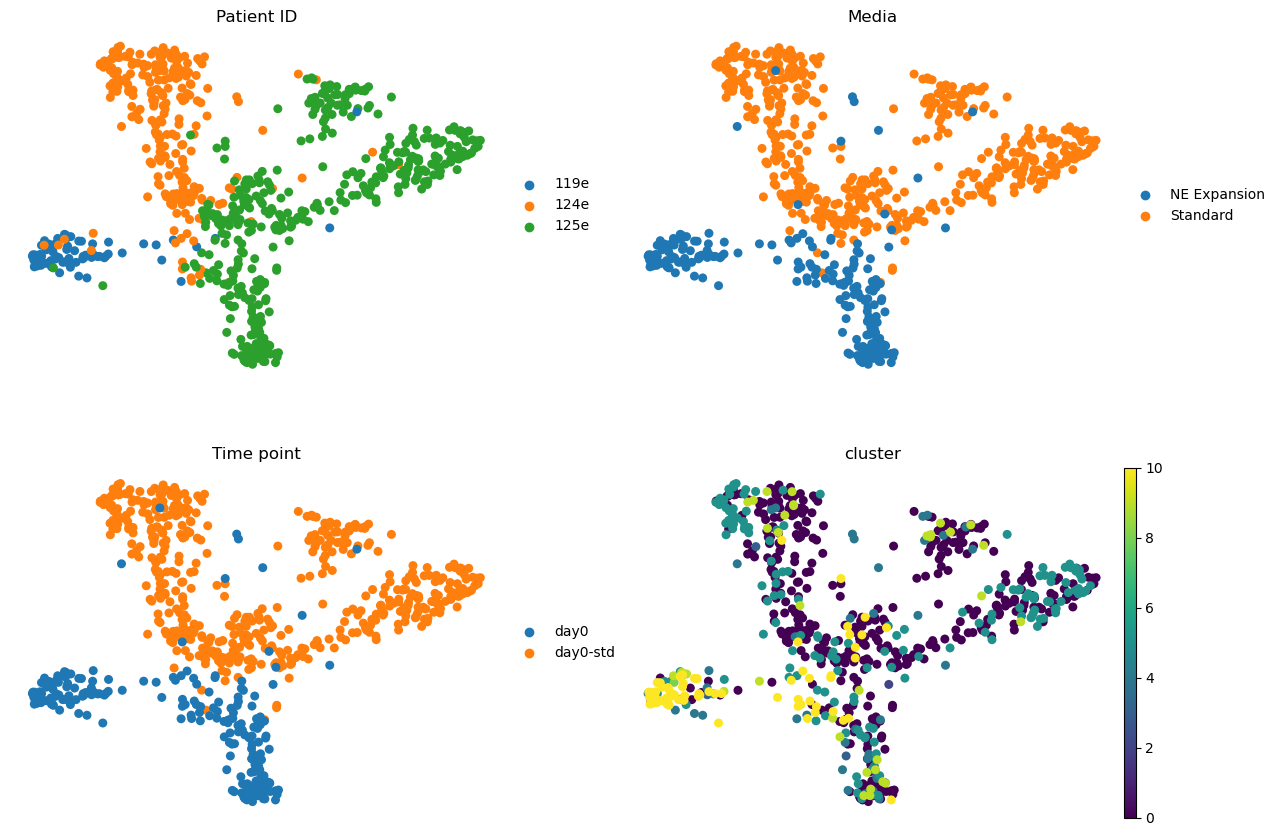

In [23]:
sc.pl.umap(
    adata,
    color= ['Patient ID','Media','Time point','cluster'],
    use_raw= False,
    frameon= False,
    ncols= 2
)

# Drawgraph
Basal_Media_Colors={
    'Standard': '#F9C74F',
    'NE Expansion': '#FF7F71'
}
plt.show()

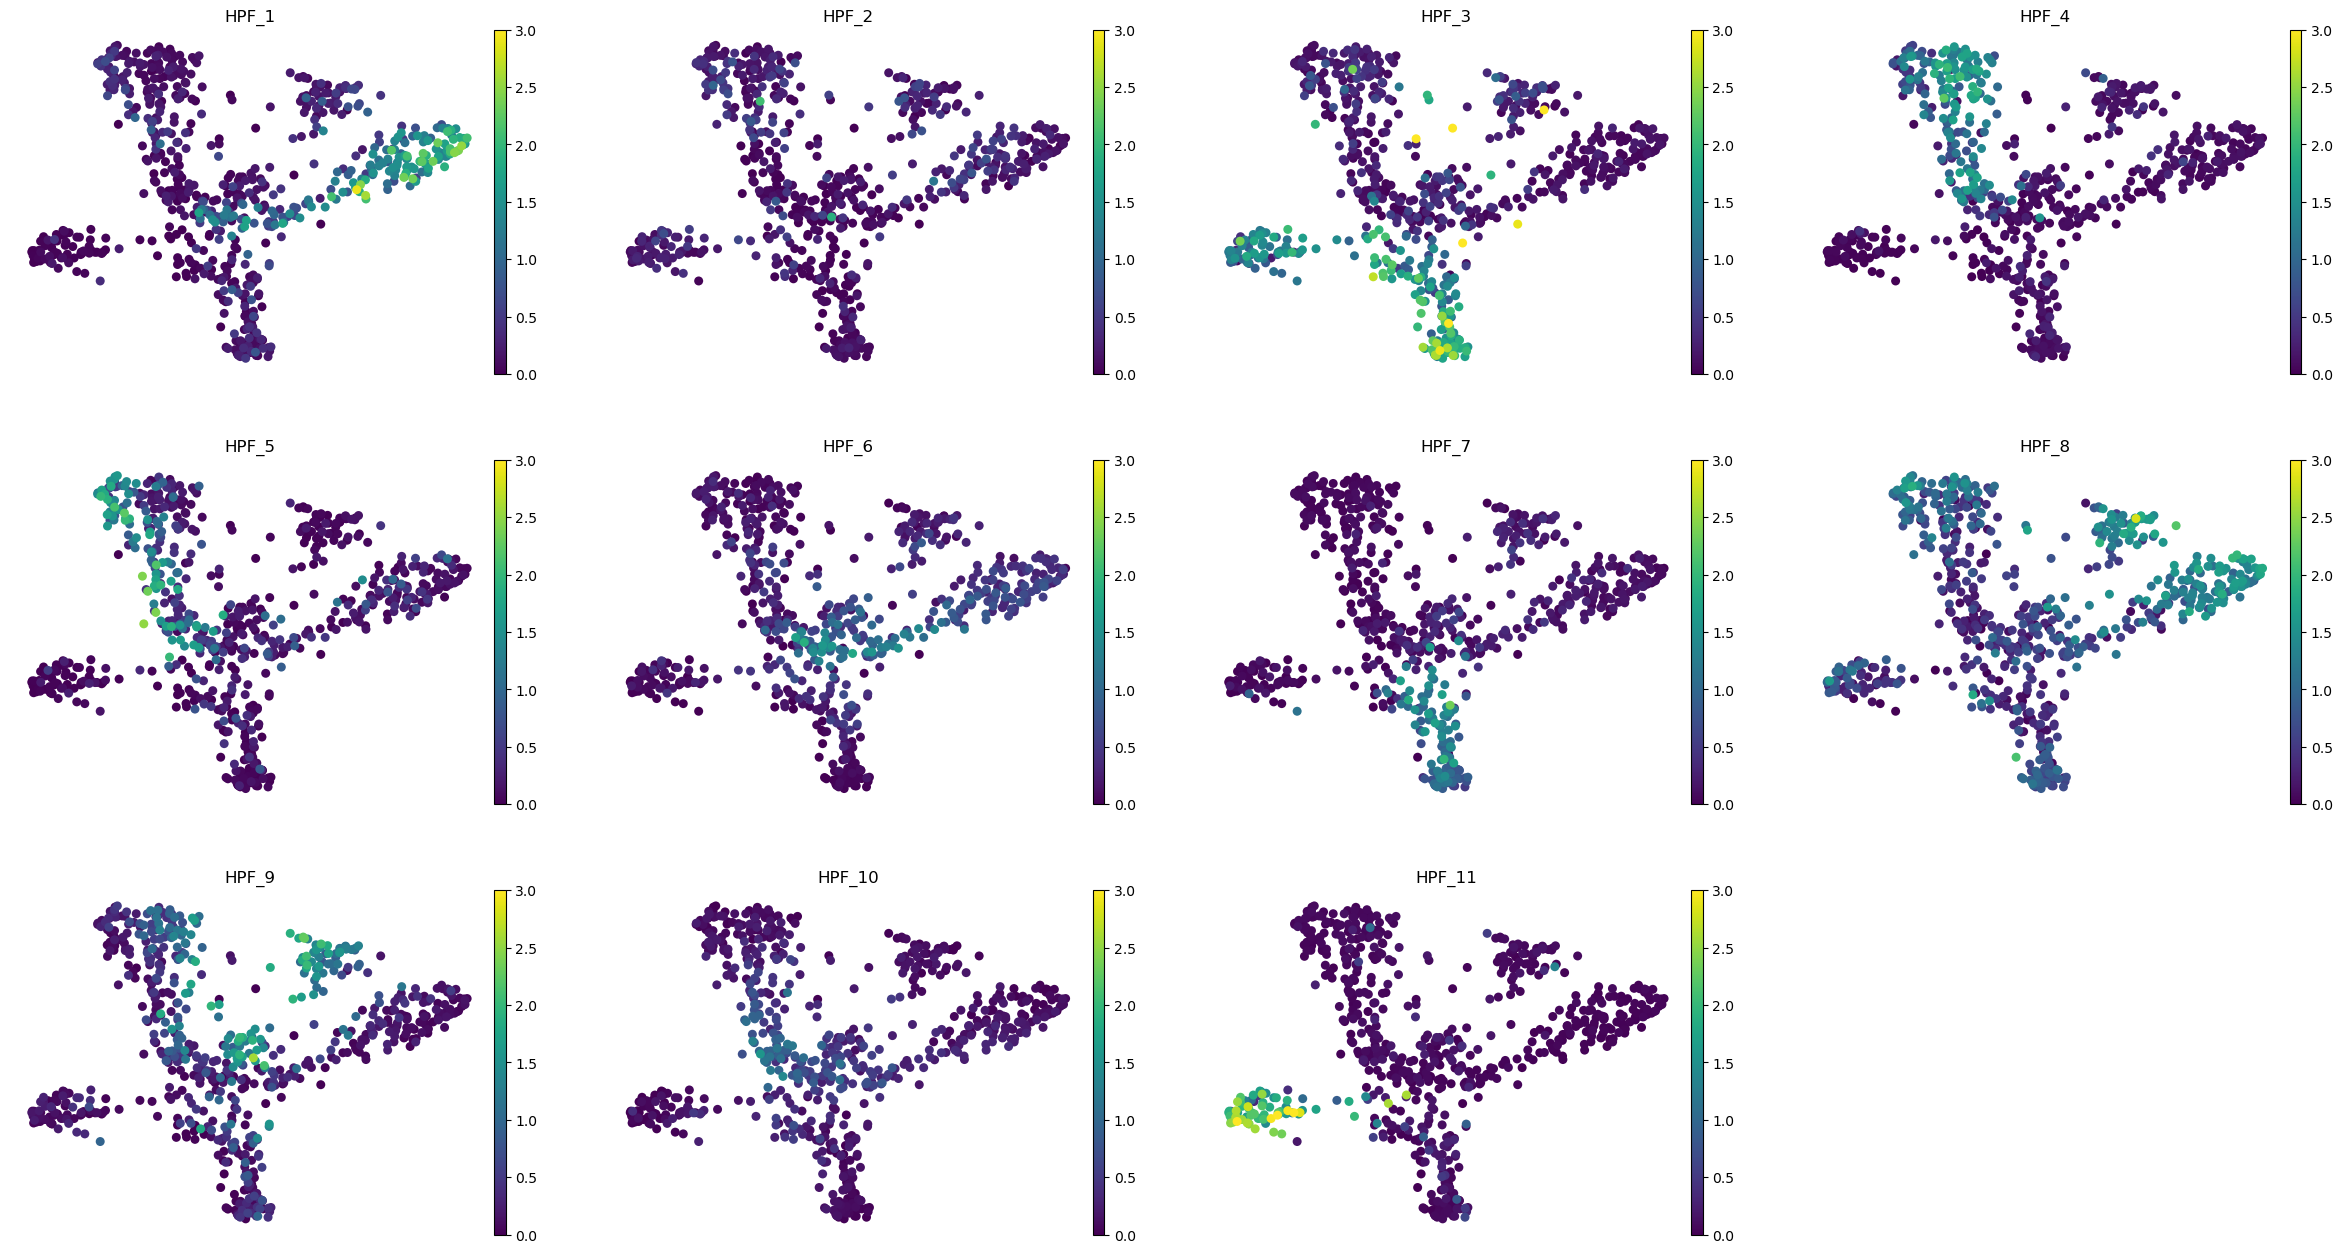

In [24]:
sc.pl.umap(
    adata,
    color= ['HPF_%d' % i for i in range(1,W.shape[1]+1)],
    use_raw= False,
    ncols= 4,
    vmin= 0, vmax=3,
    frameon= False
)

### Clustermap - Figure 6D

In [25]:
adata_clustermap = adata.copy()

corr_df = pd.DataFrame(adata_clustermap.obs[['HPF_%d'%i for i in range(1,W.shape[1]+1)]])
corr_df.index = adata_clustermap.obs['Media'].values
corr_df

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
Standard,0.042816,0.505477,0.109853,0.288949,1.551095,0.068503,0.124853,0.305318,0.049075,1.210159,0.040634
Standard,0.198562,0.454250,0.045502,0.434082,2.229750,0.069941,0.024042,0.670322,0.101536,0.001922,0.069536
Standard,0.111367,0.161380,0.323619,0.873045,1.487025,0.088760,0.084748,0.042554,0.117409,0.972398,0.035232
Standard,0.160683,0.616330,0.217316,1.838310,0.135387,0.182849,0.072946,0.492971,0.483780,0.050389,0.048230
Standard,0.170472,0.454880,0.183656,1.206953,0.540786,0.187972,0.072873,0.685482,0.708128,0.015701,0.072499
...,...,...,...,...,...,...,...,...,...,...,...
NE Expansion,0.033654,0.093256,1.619880,0.067774,0.014131,0.017028,1.045276,1.162564,0.133711,0.091389,0.020519
NE Expansion,0.031795,0.044865,1.362181,0.078428,0.019384,0.269285,1.085718,0.043185,1.191062,0.079470,0.092891
NE Expansion,0.341143,0.047412,2.016671,0.012050,0.162516,0.021083,1.188835,0.447527,0.013529,0.021745,0.026879
NE Expansion,0.059693,0.065939,2.527281,0.069253,0.032095,0.009341,0.382813,0.828407,0.146599,0.154134,0.023267


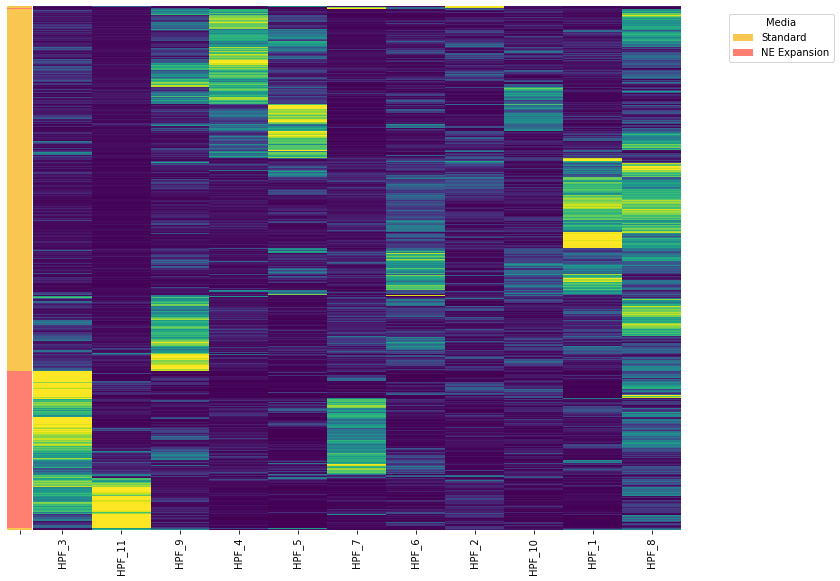

In [27]:
species = pd.Series(corr_df.index.values.tolist())
lut = Basal_Media_Colors
row_colors = species.map(lut)

# Figure 6D
g = sns.clustermap(
    corr_df.reset_index(drop= True),
    row_colors= row_colors,
    yticklabels= False,
    cmap= "viridis",
    figsize= (12,10),
    vmin= 0, vmax= 2,
    cbar_pos= None
)
plt.xticks(rotation= 90)
handles = [Patch(facecolor= lut[name]) for name in lut]
plt.legend(handles, lut, title= 'Media',
           bbox_to_anchor= (1.17, 0.8), bbox_transform= plt.gcf().transFigure, loc= 'upper right')

g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

plt.show()
g.savefig('./../figures/scHPF_clustermap.pdf', format= 'pdf', bbox_inches='tight')

### Violin plots

HPF_1...


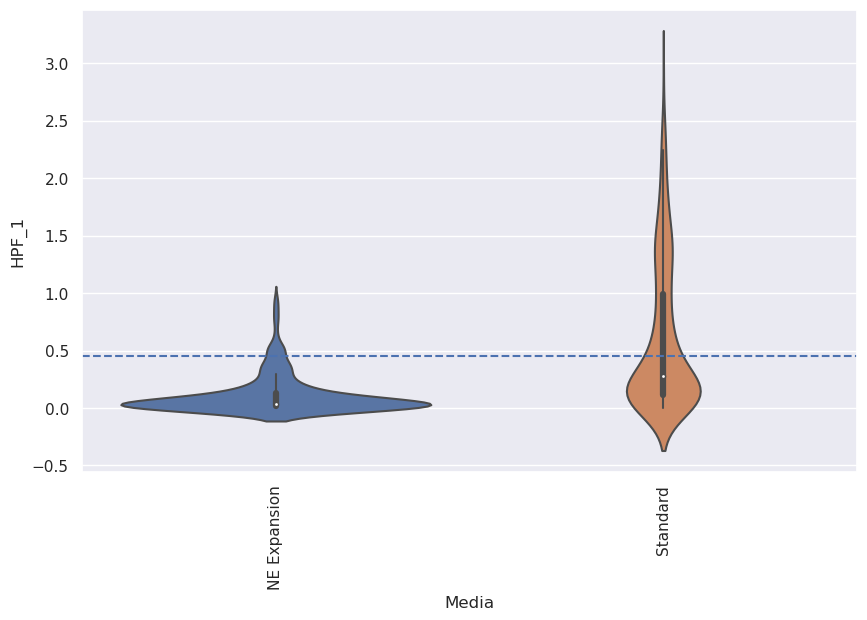

HPF_2...


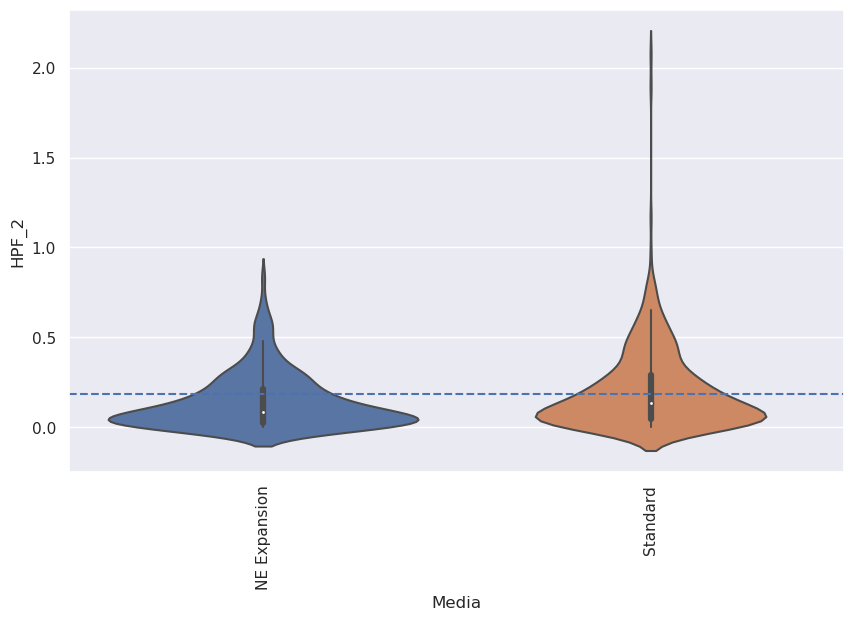

HPF_3...


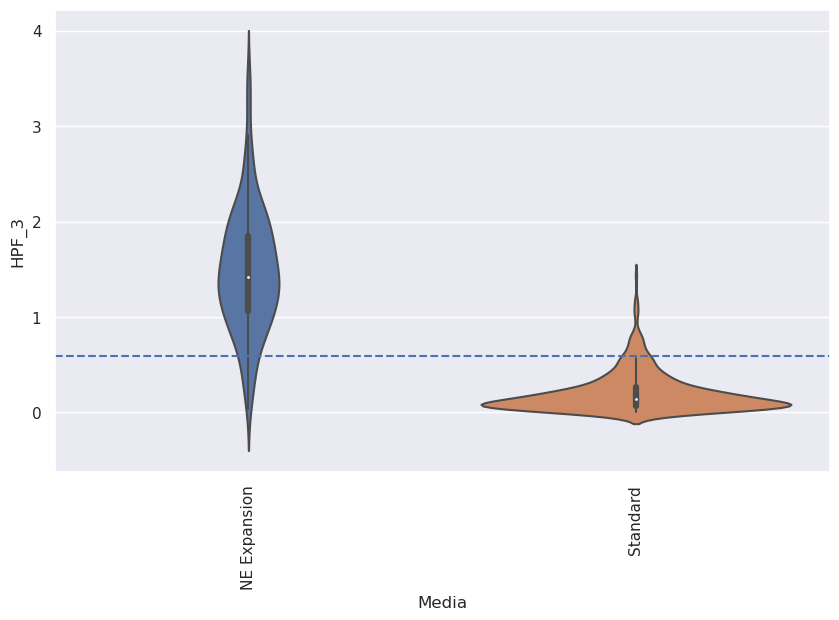

HPF_4...


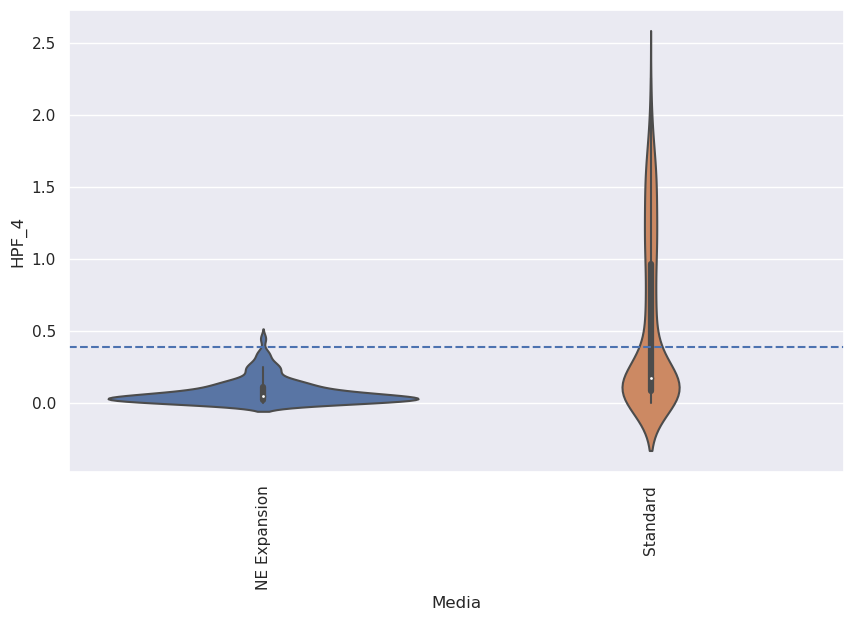

HPF_5...


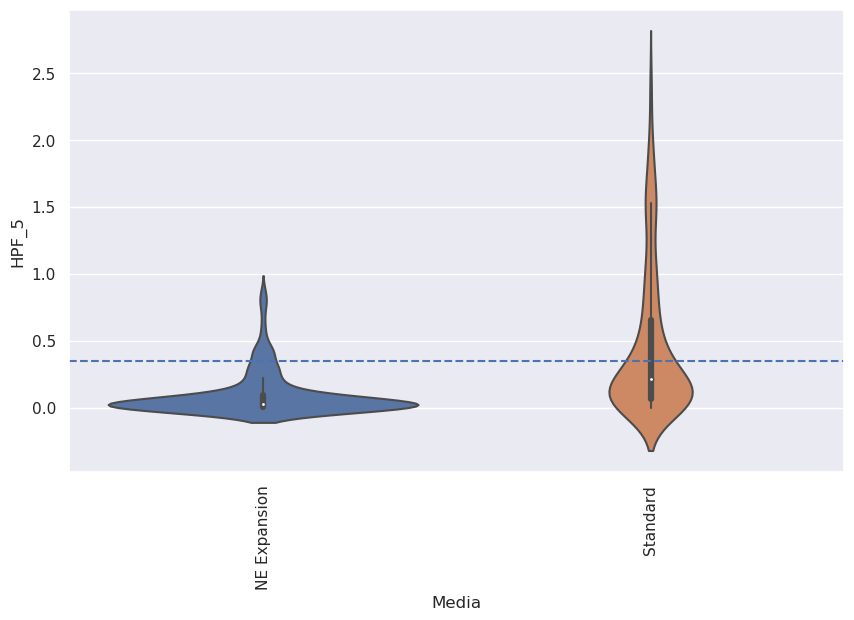

HPF_6...


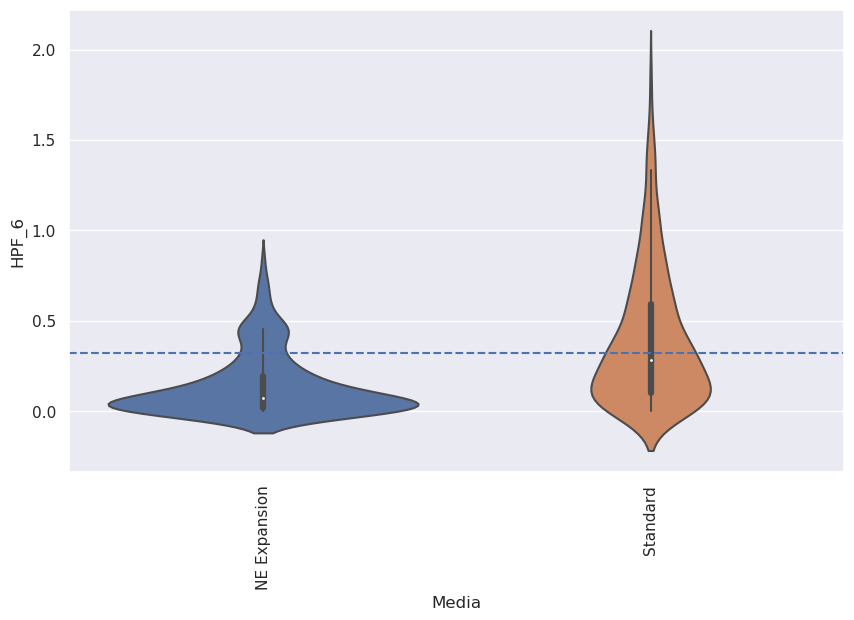

HPF_7...


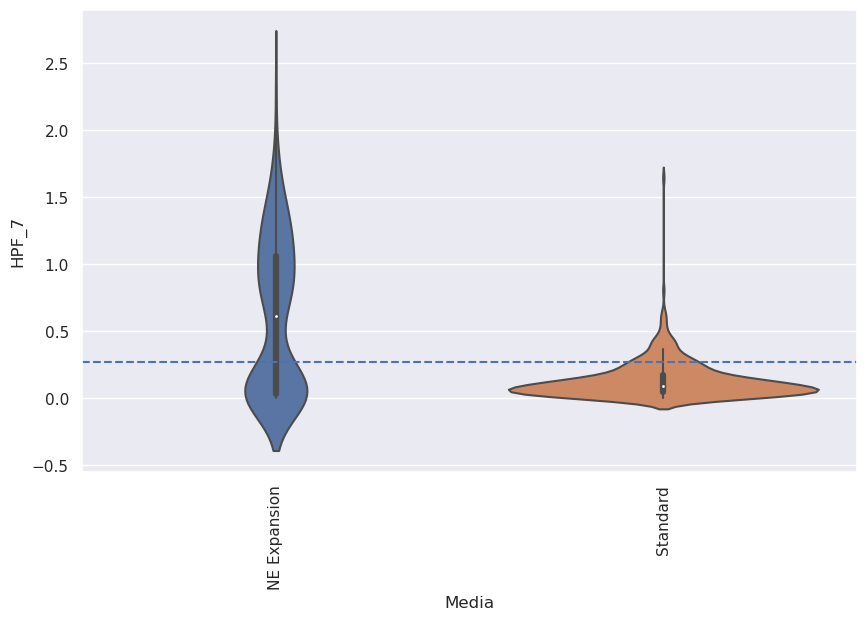

HPF_8...


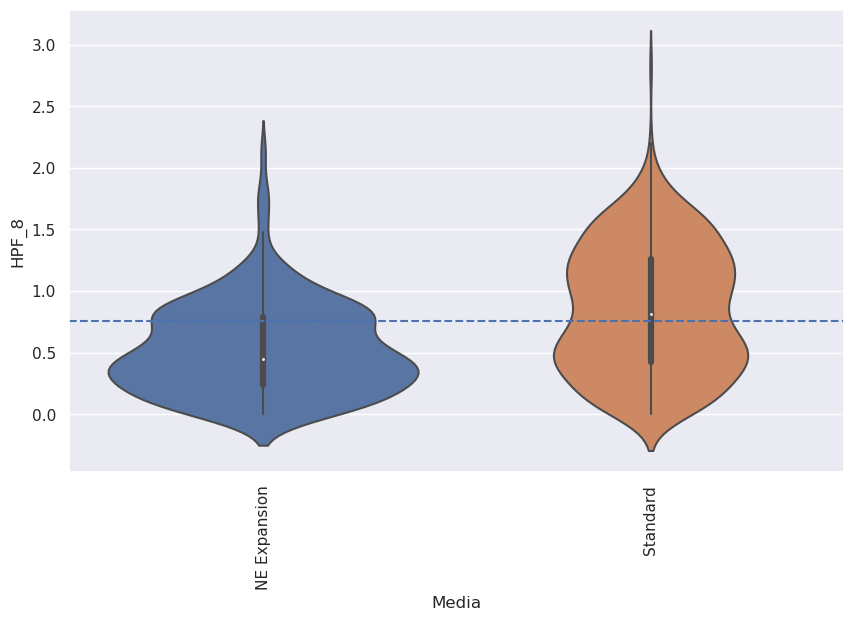

HPF_9...


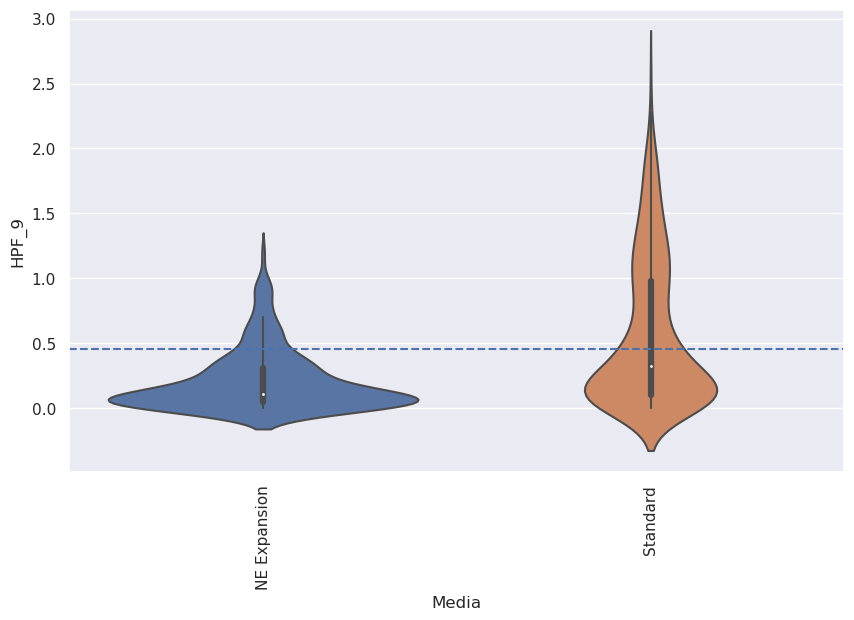

HPF_10...


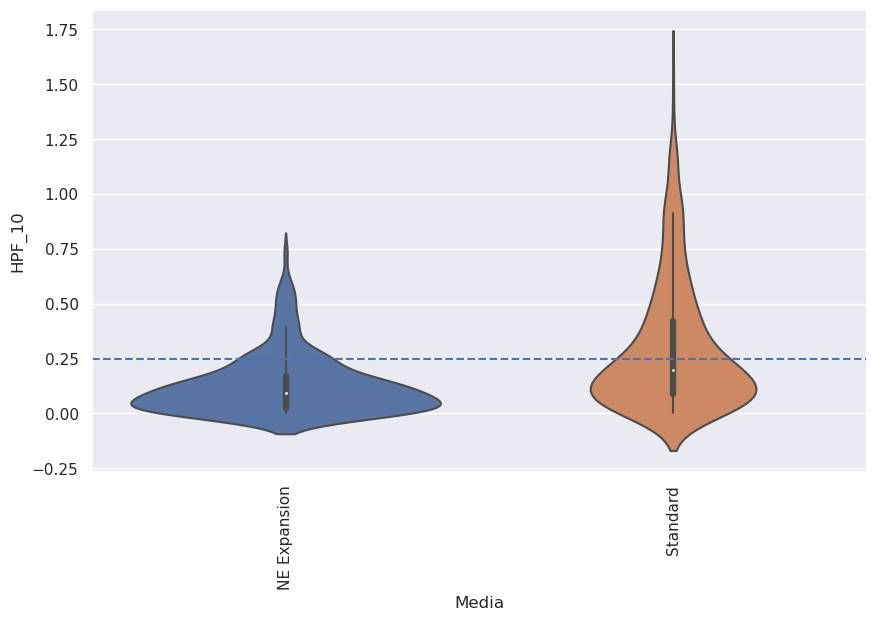

HPF_11...


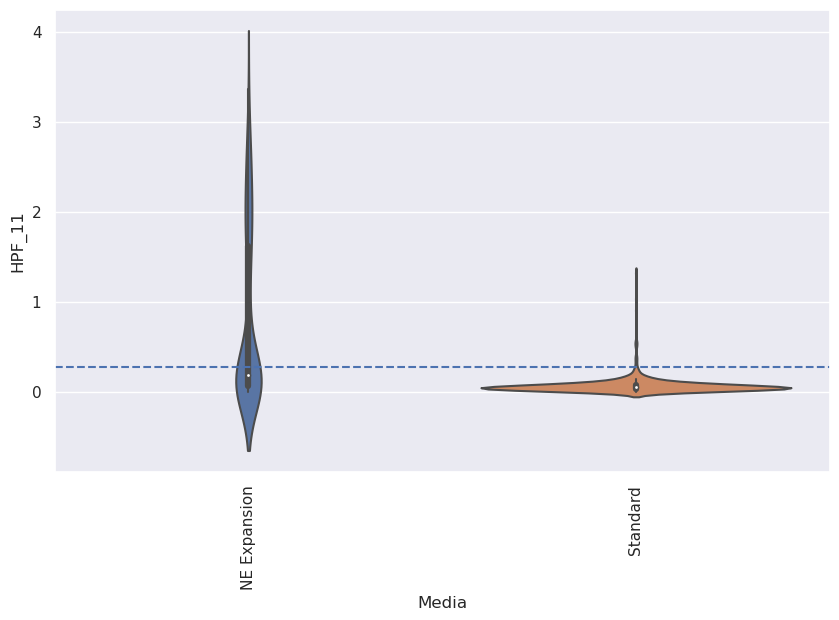

In [28]:
for i in range(W.shape[1]):
  factor = 'HPF_%d' % (i+1)
  print(factor+'...')
  sns.set_theme(rc={'figure.figsize':(10,6)})
  with plt.rc_context():
    g=sns.violinplot(x='Media', y=factor, data=adata.obs)
    plt.xticks(rotation=90)
    ax=g.axes
    ax.axhline(np.mean(adata.obs[factor]),ls='--')
    plt.show()

#### Interesting clusters - T-tests

In [29]:
medias = list(Basal_Media_Colors.keys())
ttest_results = {
    f'HPF_{i}' : {}
    for i in range(1, W.shape[1] + 1)
}
for i in range(1, W.shape[1] + 1):
    cluster = f'HPF_{i}'
    for j, media in enumerate(medias):
        for k in range(j+1, len(medias)):
            ttest_results[cluster][f'({media},{medias[k]})'] = ttest_ind(
                    adata.obs[cluster][adata.obs['Media'] == media],
                    adata.obs[cluster][adata.obs['Media'] == medias[k]]
                )
ttest_results

{'HPF_1': {'(Standard,NE Expansion)': Ttest_indResult(statistic=10.991030055203547, pvalue=4.502348140422721e-26)},
 'HPF_2': {'(Standard,NE Expansion)': Ttest_indResult(statistic=3.6996410319682065, pvalue=0.00023247467825633492)},
 'HPF_3': {'(Standard,NE Expansion)': Ttest_indResult(statistic=-40.392573314825036, pvalue=1.092386080602924e-186)},
 'HPF_4': {'(Standard,NE Expansion)': Ttest_indResult(statistic=11.073524267018833, pvalue=2.0556985169873898e-26)},
 'HPF_5': {'(Standard,NE Expansion)': Ttest_indResult(statistic=9.438013473087608, pvalue=5.228147381398688e-20)},
 'HPF_6': {'(Standard,NE Expansion)': Ttest_indResult(statistic=9.586295162026673, pvalue=1.4747901223032687e-20)},
 'HPF_7': {'(Standard,NE Expansion)': Ttest_indResult(statistic=-17.15454831554422, pvalue=1.664436768443852e-55)},
 'HPF_8': {'(Standard,NE Expansion)': Ttest_indResult(statistic=8.272073037070685, pvalue=6.423940586889138e-16)},
 'HPF_9': {'(Standard,NE Expansion)': Ttest_indResult(statistic=8.8912

### Correlation Bar Graphs

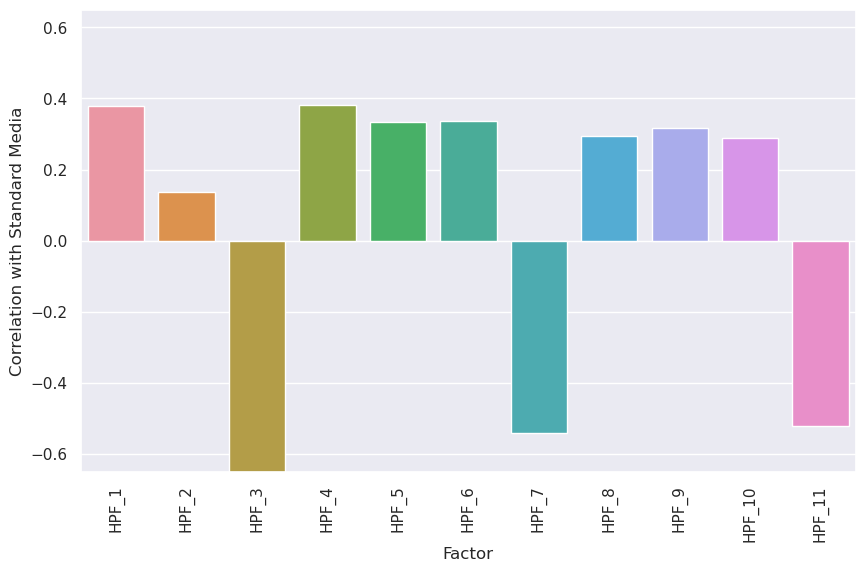

In [30]:
# HPF gene programs correlation with Standard media condition amongst basal cells

adata.obs['IsStandard'] = adata.obs['Media'].values == 'Standard'
adata.obs['IsStandard'].head()

hpf_pst_corr = []

for i in range(W.shape[1]):
    hpf_pst_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['IsStandard'].values)[0,1])

hpf_pst_corr = pd.DataFrame(hpf_pst_corr, index=['HPF_%d'%(i+1) for i in range(W.shape[1])], columns=['IsStandard'])

sns.barplot(x=hpf_pst_corr.index, y=hpf_pst_corr['IsStandard'])
plt.xticks(rotation=90)
plt.xlabel('Factor')
plt.ylabel('Correlation with Standard Media')
plt.ylim(-.65,.65)
plt.show()

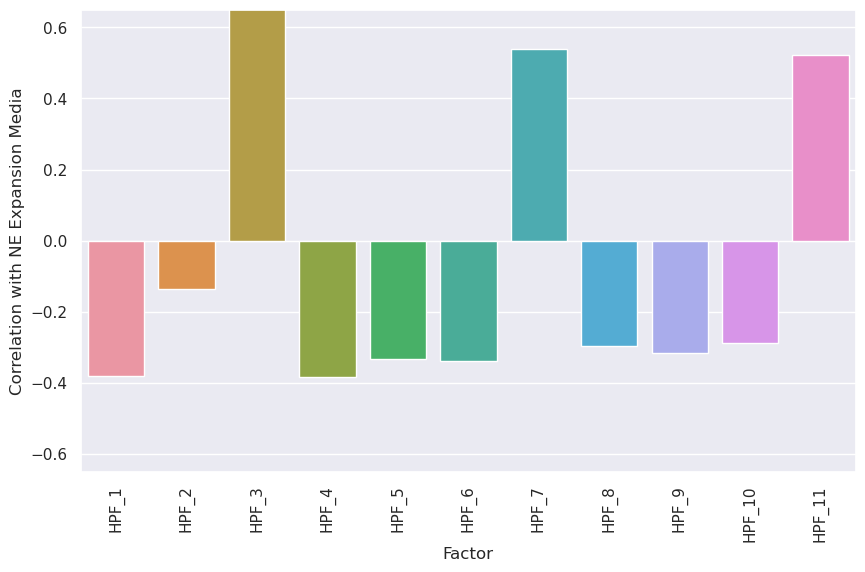

In [31]:
# HPF gene programs correlation with NE Expansion media condition amongst basal cells

adata.obs['IsNEE'] = adata.obs['Media'].values == 'NE Expansion'
adata.obs['IsNEE'].head()

hpf_pst_corr = []

for i in range(W.shape[1]):
    hpf_pst_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['IsNEE'].values)[0,1])

hpf_pst_corr = pd.DataFrame(hpf_pst_corr, index=['HPF_%d'%(i+1) for i in range(W.shape[1])], columns=['IsNEE'])

sns.barplot(x=hpf_pst_corr.index, y=hpf_pst_corr['IsNEE'])
plt.xticks(rotation=90)
plt.xlabel('Factor')
plt.ylabel('Correlation with NE Expansion Media')
plt.ylim(-.65,.65)
plt.show()

### Enrichment for Media - Figure 6E

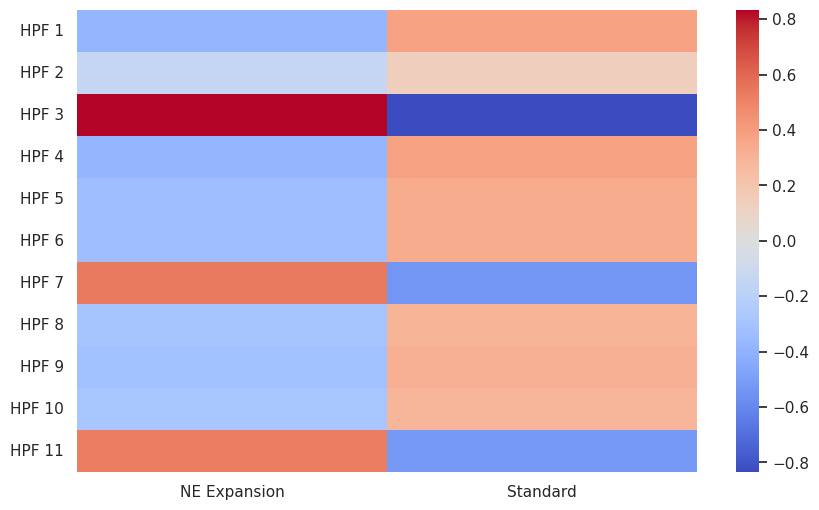

In [32]:
# HPF gene programs correlation with NE Expansion media condition amongst basal cells

adata.obs['IsNEE'] = adata.obs['Media'].values == 'NE Expansion'
adata.obs['IsNEE'].head()

adata.obs['IsStandard'] = adata.obs['Media'].values == 'Standard'
adata.obs['IsStandard'].head()

hpf_pst_corr_NEE = []
hpf_pst_corr_Standard = []

for i in range(W.shape[1]):
    hpf_pst_corr_NEE.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['IsNEE'].values)[0,1])
    hpf_pst_corr_Standard.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['IsStandard'].values)[0,1])

hpf_pst_corr_df = pd.DataFrame([hpf_pst_corr_NEE, hpf_pst_corr_Standard]).T
hpf_pst_corr_df.index=['HPF %d'%(i+1) for i in range(W.shape[1])]
hpf_pst_corr_df.columns=['NE Expansion','Standard']

# Figure 6E
fig, axes = plt.subplots()
sns.heatmap(hpf_pst_corr_df, cmap='coolwarm', ax= axes, center= 0)
fig.show()
fig.savefig('./../figures/media_enrichment.pdf', format= 'pdf', bbox_inches='tight')

## LAP signature enrichment

LAP markers: SCGB3A2; SFTPB;

In [33]:
sc.tl.score_genes(adata, ['SCGB3A2', 'SFTPB'],
                  score_name='Distal_score')
adata.obs['Distal_score'].head()

Cell ID
s003.1   -1.08
s003.3   -6.86
s003.4   -1.56
s003.5   -5.06
s003.8   -5.72
Name: Distal_score, dtype: float64

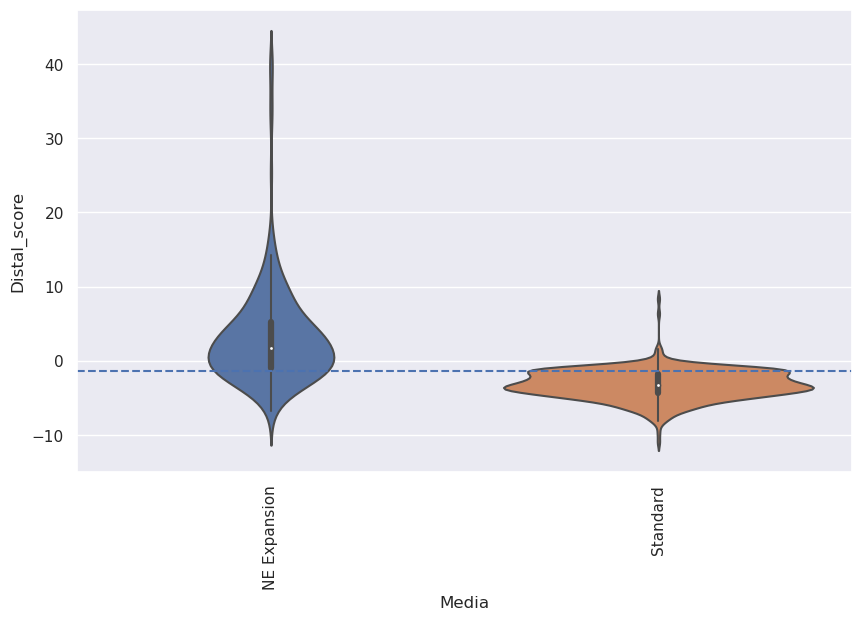

In [34]:
g=sns.violinplot(x='Media', y= 'Distal_score', data= adata.obs)
plt.xticks(rotation= 90)
ax=g.axes
ax.axhline(np.mean(adata.obs['Distal_score']), ls='--')
plt.show()

In [35]:
x = adata.obs['Distal_score'][adata.obs['Media']== 'NE Expansion']
y = adata.obs['Distal_score'][adata.obs['Media']== 'Standard']
print(ttest_ind(x,y))

Ttest_indResult(statistic=19.562725299929888, pvalue=1.3924897971628002e-68)


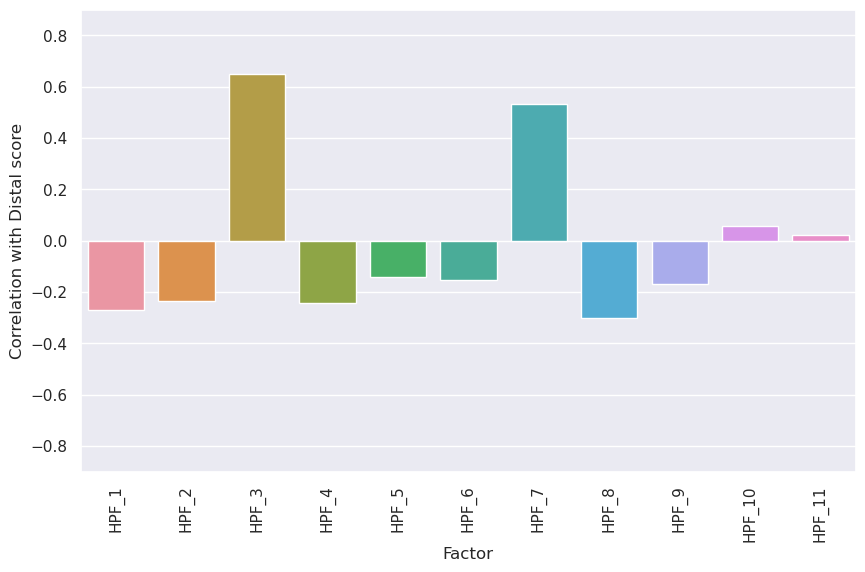

In [36]:
hpf_distal_corr = []

for i in range(W.shape[1]):
    hpf_distal_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Distal_score'].values)[0,1])

hpf_distal_corr = pd.DataFrame(hpf_distal_corr, index=['HPF_%d'%(i+1) for i in range(W.shape[1])], columns=['Distal_score'])

sns.barplot(x= hpf_pst_corr.index, y= hpf_distal_corr['Distal_score'])
plt.xticks(rotation=90)
plt.xlabel('Factor')
plt.ylabel('Correlation with Distal score')
plt.ylim(-0.9, 0.9)
plt.show()

## Celltype enrichments - Figure 6F

#### Basal markers

KRT5; KRT15; TP63;

In [37]:
sc.tl.score_genes(adata, ['KRT5', 'KRT15', 'TP63'],
                  score_name='Basal_score')
adata.obs['Basal_score'].head()

Cell ID
s003.1    -0.413333
s003.3    15.190000
s003.4     1.973333
s003.5    44.420000
s003.8     4.836667
Name: Basal_score, dtype: float64

#### Neuroendocrine markers

ASCL1; CHGA; UCHL1; GRP;

In [38]:
sc.tl.score_genes(adata, ['ASCL1', 'CHGA', 'UCHL1', 'GRP'],
                  score_name='NE_score')
adata.obs['NE_score'].head()

Cell ID
s003.1    0.00
s003.3   -0.06
s003.4   -0.02
s003.5   -0.02
s003.8    0.00
Name: NE_score, dtype: float64

#### Multiciliated markers

FOXJ1; DNAH5;

In [39]:
sc.tl.score_genes(adata, ['FOXJ1', 'DNAH5'],
                  score_name='Multiciliated_score')
adata.obs['Multiciliated_score'].head()

Cell ID
s003.1    0.45
s003.3   -0.27
s003.4   -0.03
s003.5   -0.16
s003.8   -0.31
Name: Multiciliated_score, dtype: float64

#### Goblet markers

FOXA3; SPDEF; MUC5AC;

In [40]:
sc.tl.score_genes(adata, ['FOXA3', 'SPDEF', 'MUC5AC'],
                  score_name='Goblet_score')
adata.obs['Goblet_score'].head()

Cell ID
s003.1    0.46
s003.3   -0.26
s003.4   -0.07
s003.5    0.42
s003.8   -0.15
Name: Goblet_score, dtype: float64

#### Secretory markers

CYP2F1; SCGB1A1; CP;

In [41]:
sc.tl.score_genes(adata, ['CYP2F1', 'SCGB1A1', 'CP'],
                  score_name='Secretory_score')
adata.obs['Secretory_score'].head()

Cell ID
s003.1    13.070000
s003.3    25.346667
s003.4     4.376667
s003.5     2.720000
s003.8    12.600000
Name: Secretory_score, dtype: float64

#### Heatmap - Figure 6F

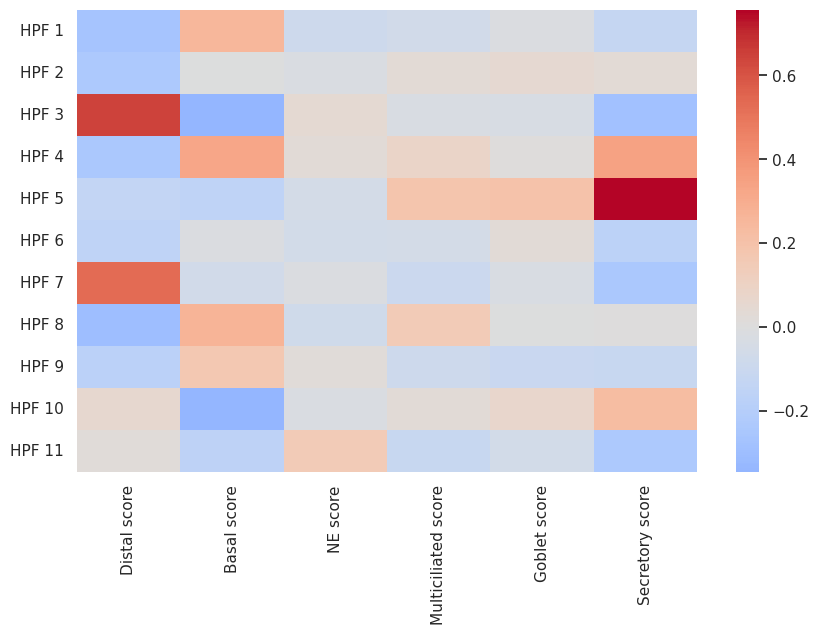

In [42]:
hpf_distal_corr = []
hpf_basal_corr = []
hpf_ne_corr = []
hpf_multiciliated_corr = []
hpf_goblet_corr = []
hpf_secretory_corr = []


for i in range(W.shape[1]):
    hpf_distal_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Distal_score'].values)[0,1])
    hpf_basal_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Basal_score'].values)[0,1])
    hpf_ne_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['NE_score'].values)[0,1])
    hpf_multiciliated_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Multiciliated_score'].values)[0,1])
    hpf_goblet_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Goblet_score'].values)[0,1])
    hpf_secretory_corr.append(np.corrcoef(adata.obs['HPF_%d'%(i+1)].values,adata.obs['Secretory_score'].values)[0,1])

hpf_celltype_corr = pd.DataFrame([hpf_distal_corr, hpf_basal_corr, hpf_ne_corr, hpf_multiciliated_corr, hpf_goblet_corr, hpf_secretory_corr]).T
hpf_celltype_corr.index=['HPF %d'%(i+1) for i in range(W.shape[1])]
hpf_celltype_corr.columns=['Distal score', 'Basal score', 'NE score', 'Multiciliated score', 'Goblet score', 'Secretory score']

fig, axes = plt.subplots()
sns.heatmap(hpf_celltype_corr, cmap='coolwarm', ax= axes, cbar= True, center= 0)
fig.show()
fig.savefig('./../figures/cell_type_scores.pdf', format= 'pdf', bbox_inches='tight')

## scHPF top genes - Figure S6D

In [43]:
GeneScores = pd.DataFrame(H, index=adata.var_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])])
GeneScores

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
ENSG00000238009,0.212159,0.254006,0.177994,0.208094,0.271193,0.254100,0.235649,1.978922,0.201474,0.263862,0.214525
ENSG00000268903,0.057730,0.110385,0.052757,0.066569,0.073543,0.090409,0.103339,2.968168,0.566005,0.134572,0.073008
ENSG00000241860,0.066371,0.124556,1.241658,0.080048,0.089953,0.105860,0.115754,2.158841,0.074627,0.145177,0.092688
ENSG00000228463,1.564725,0.091530,1.072263,0.580527,0.060414,0.076789,0.079576,0.028672,0.047933,0.112376,0.582589
ENSG00000290385,0.052994,0.100548,0.044466,1.268759,0.618430,0.084325,0.091248,1.796938,0.053006,0.118404,0.067724
...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.115376,1.964647,0.215813,0.736202,0.231686,0.006473,0.007233,0.867248,0.003725,0.011128,0.140296
MT-TE,0.539905,0.136904,0.071713,0.090040,1.165024,0.122183,1.775670,0.057825,0.081567,0.158244,0.095717
MT-CYB,0.184319,0.488549,0.166306,0.206080,0.003355,0.057811,0.099154,0.081936,0.023098,2.897573,0.091817
MT-TT,0.943692,0.238712,0.165407,0.177328,0.193411,0.221593,0.234473,1.501002,0.168943,0.243604,0.191885


### Top 500 ranked genes for every module

In [44]:
# GSEA for above data
gep_scores = GeneScores

# Create top 500 genes list for each module
genelist = pd.DataFrame()
for i in range(1, K+1):
    genelist_temp = []
    for g in gep_scores['HPF_%d' % i].sort_values(ascending = False).index[:500]:
        genelist_temp.append(g)
    genelist['HPF_%d' % i] = genelist_temp

genelist

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
0,LY6D,ANKRD33B,EDN3,ATP10B,KLK13,ZP3,EMX2,TMEM91,COL14A1,IFNG,XIST
1,KRT6A,EEF1A1P1,GNG13,CDH5,MUC16,ENSG00000234080,PAX5,ENSG00000280187,GABRA1,CCL4,NPTX1
2,CCDC190,RPL7AP45,PLCB2,BHLHE41,KLK12,ENSG00000280367,PCAT5,ANKRD10-IT1,FRZB,ENSG00000273399,SHISAL2B
3,KRT6C,USP2,PURPL,PHEX,FCMR,ENSG00000274128,TMTC1,CLHC1,HMCN1,MT-RNR2,CEMIP
4,RBM20,ENSG00000243004,GNB3,ENSG00000285873,TF,ASB2,LIMS2,ROBO3,LUM,IER3-AS1,DUSP6
...,...,...,...,...,...,...,...,...,...,...,...
495,SLC39A2,SLC25A23,ENSG00000261924,SMIM10L2A,SLC4A11,CD44,TRIM52-AS1,C14orf39,CDKL3,SGCE,ENSG00000229618
496,MARCHF1,ELP5,ENSG00000267559,MICOS10P2,ENSG00000290490,ITGAE,ENSG00000269388,PDLIM3,ARHGEF17,LINC01806,ABTB2
497,PRR15,POLDIP2,MIAT,ENSG00000235609,ENSG00000278058,NUP93,SLC25A37,ENSG00000273489,CHTF18,TMEM30B,CYP4Z1
498,TBC1D3D,TOR1B,ENSG00000274460,ENSG00000279416,TENM4,LINC00240,RPS3A,FMNL1-DT,ENSG00000273391,RELL1,ENSG00000277368


### Full ranked genes for every module

In [45]:
# Create full ranked genes list for each module
genelist_full = pd.DataFrame()
for i in range(1,K+1):
    genelist_temp = []
    for g in gep_scores['HPF_%d' % i].sort_values(ascending = False).index:
        genelist_temp.append(g)
    genelist_full['HPF_%d' % i] = genelist_temp

genelist_full.to_excel('./../trained_models/Basal_subset_scHPF_modules_genes.xlsx', index= False)

### Ranking for Basal markers - Figure S6D

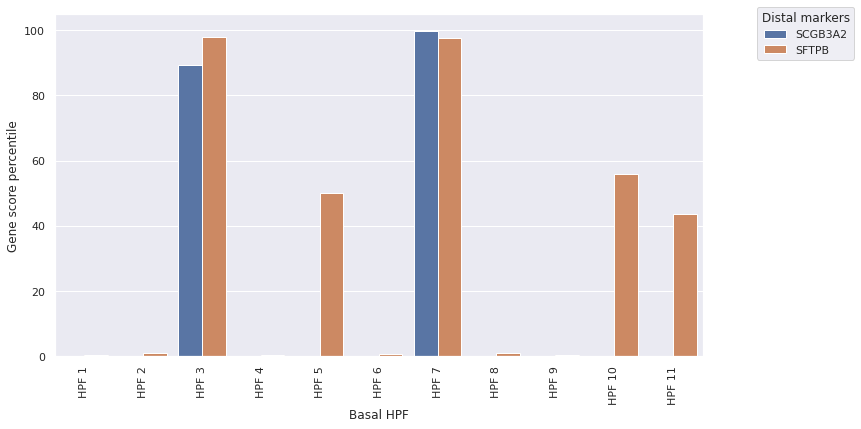

In [46]:
# Figure S6D
genes_to_plot = ['SCGB3A2', 'SFTPB']
rows = []

for gene in genes_to_plot:
    for hpf in genelist_full.columns:
        gene_list = genelist_full[hpf].tolist()
        pos = gene_list.index(gene)
        percentile = 100 * (1 - pos / len(gene_list))

        rows.append({
            'Gene': gene,
            'HPF': hpf,
            'Rank': pos,
            'Percentile': percentile
        })

df_long = pd.DataFrame(rows)

fig, axes = plt.subplots()

sns.barplot(
    data= df_long,
    x= 'HPF',
    y= 'Percentile',
    hue= 'Gene',
    ax= axes
)

plt.xticks(rotation=90)
plt.xlabel('Basal HPF')
new_labels = [label.get_text().replace('_', ' ') for label in axes.get_xticklabels()]
axes.set_xticklabels(new_labels, rotation=90)
# plt.xticks()
plt.ylabel('Gene score percentile')
fig.legend(title='Distal markers', bbox_to_anchor=(1.05, 1), loc='upper left')
fig.tight_layout()
axes.get_legend().set_visible(False)
fig.show()
fig.savefig('./../figures/distal_markers.pdf', format= 'pdf', bbox_inches='tight')


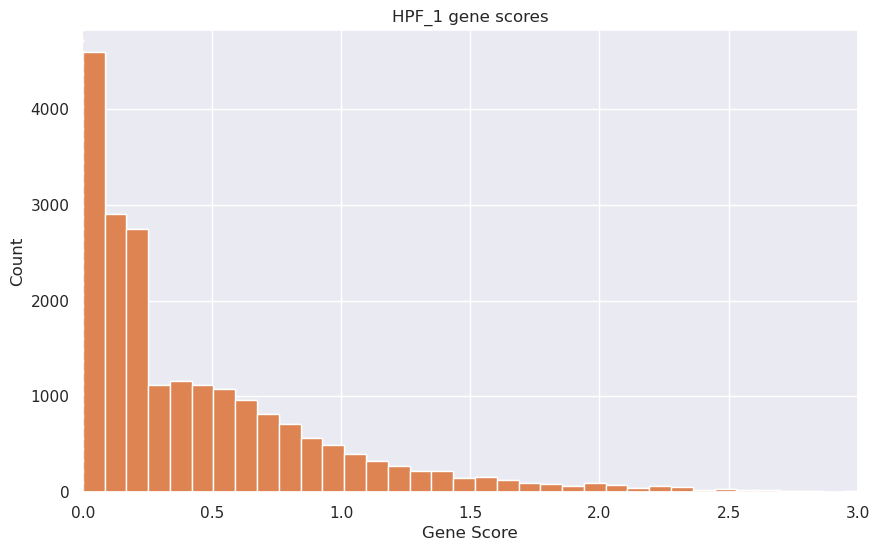

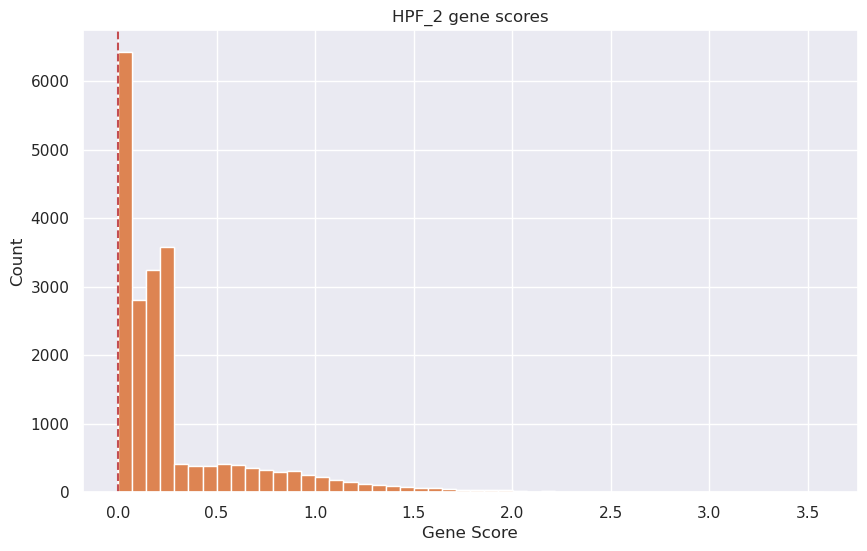

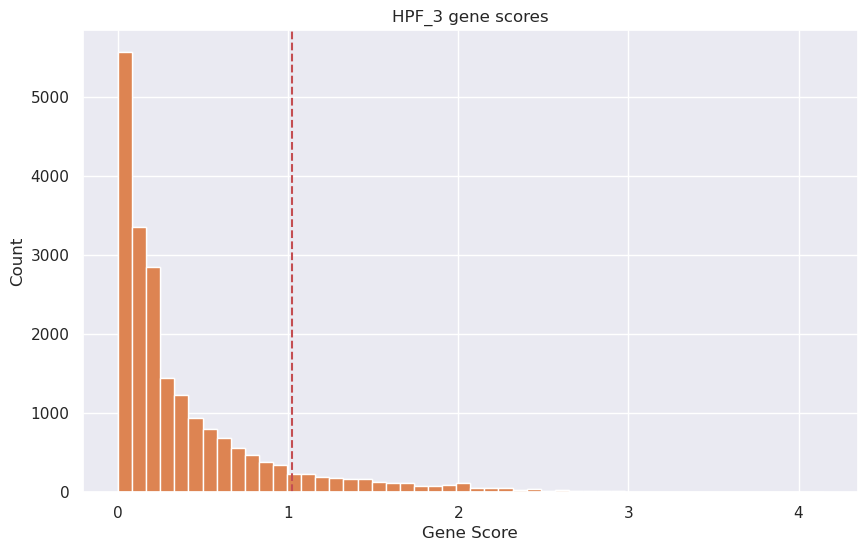

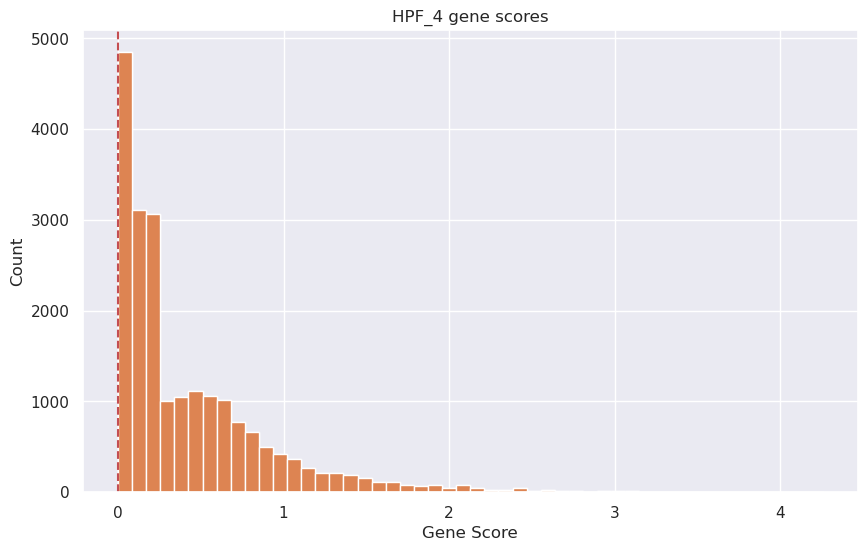

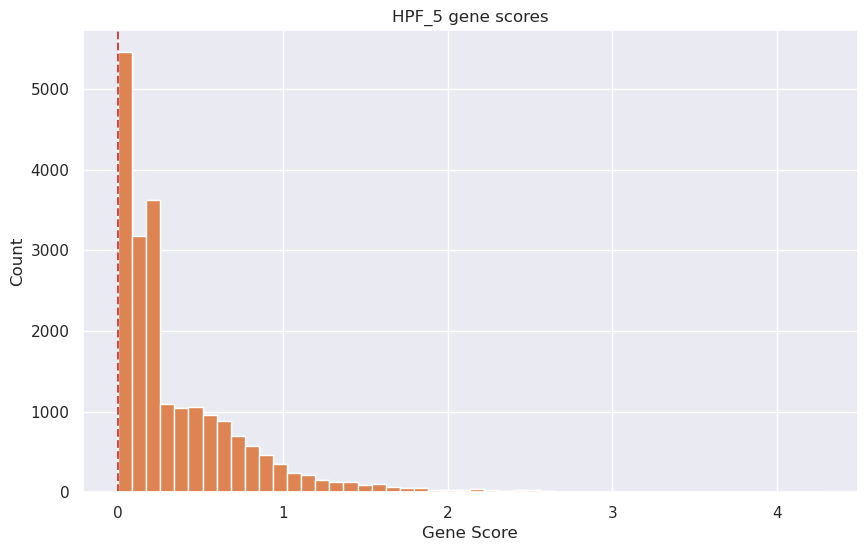

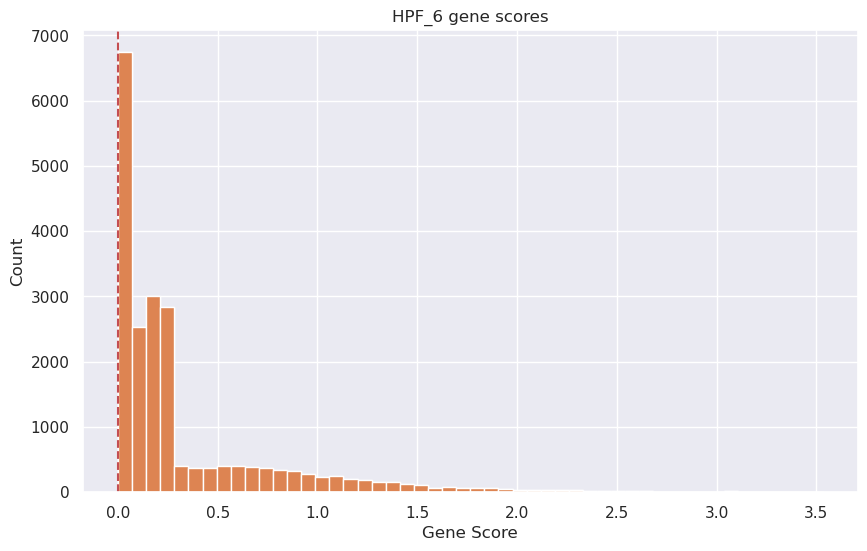

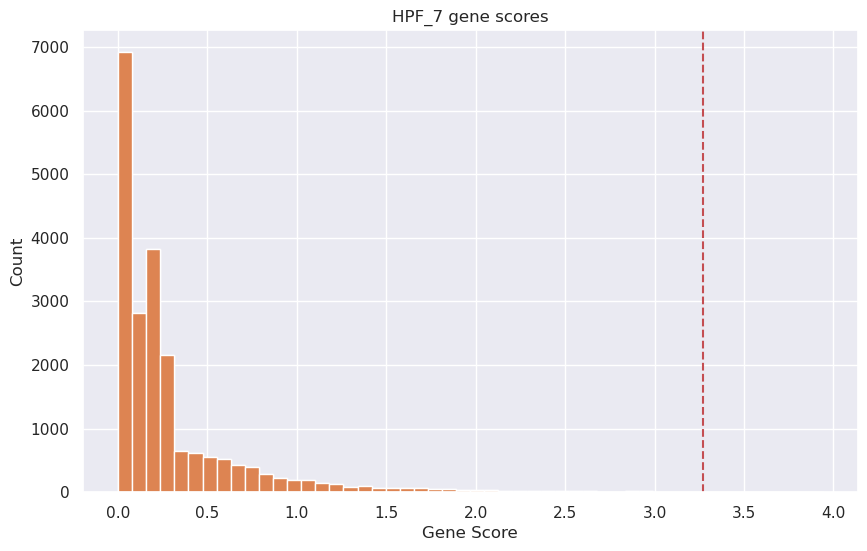

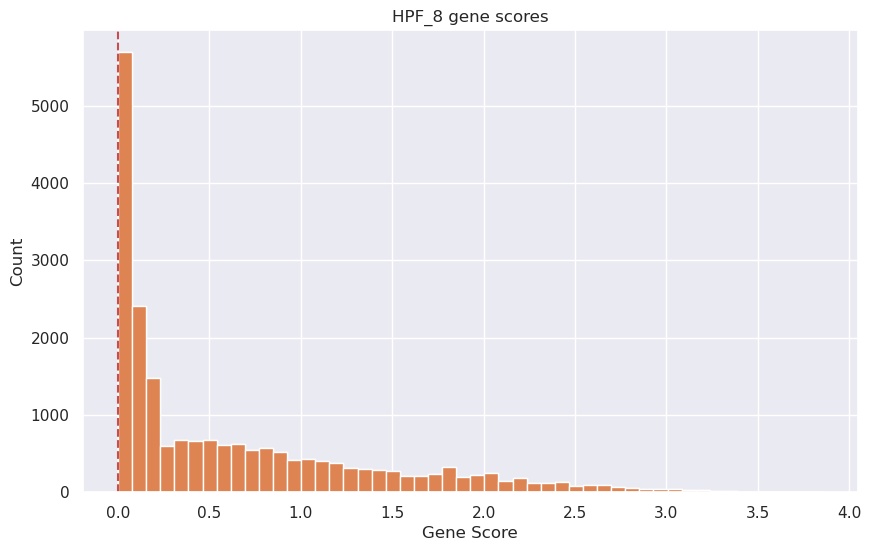

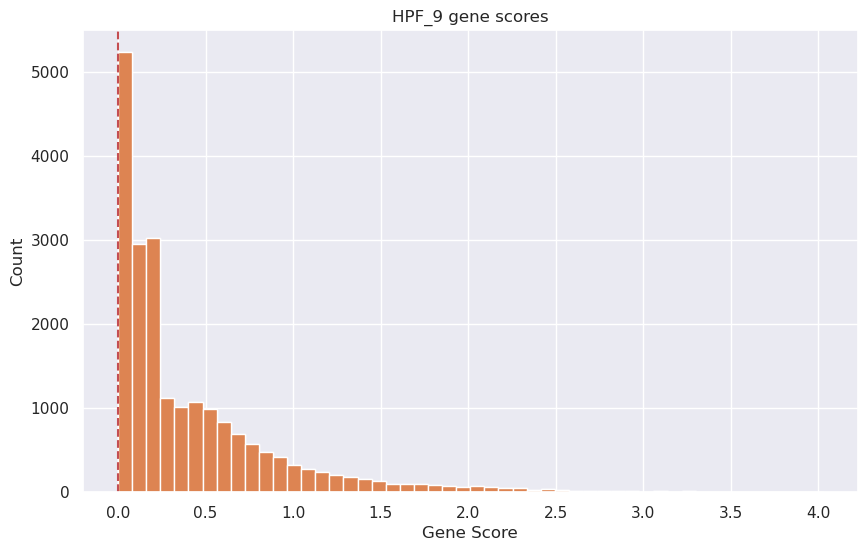

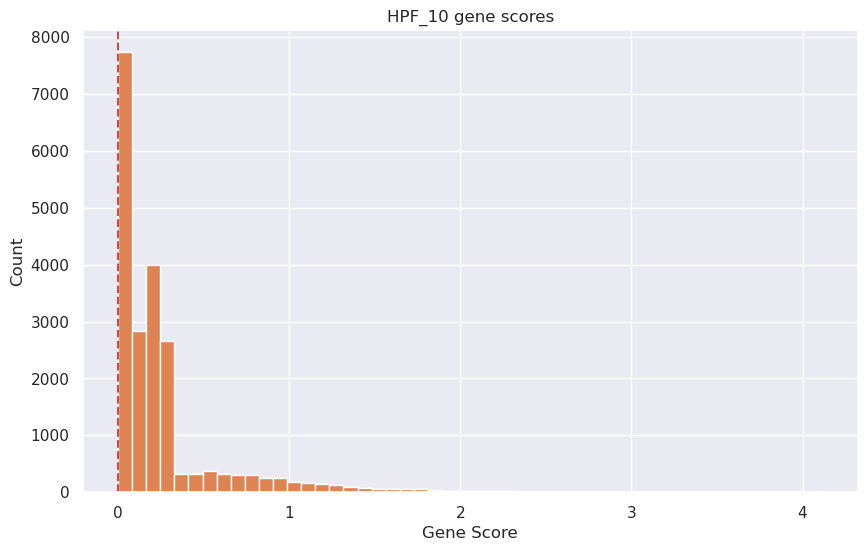

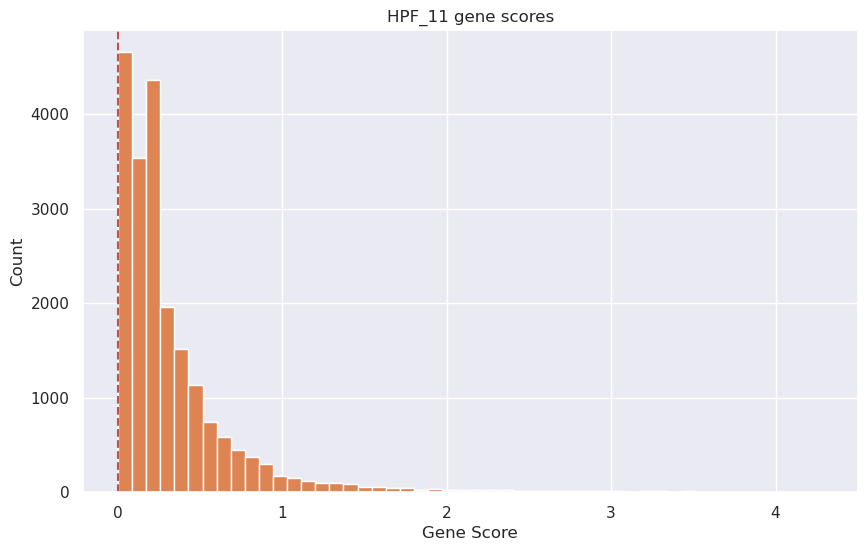

In [47]:
ax = plt.gca()
ax.set_xlim([0,3])
SCGB3A2_index = np.where(gep_scores.index=='SCGB3A2')[0][0]

for hpf in genelist_full.columns:
  h = plt.hist(gep_scores[hpf], bins=50)
  h = plt.hist(gep_scores[hpf], bins=50)
  plt.axvline(gep_scores[hpf][SCGB3A2_index],ls='--',c='r')
  plt.title(hpf+' gene scores')
  plt.xlabel('Gene Score')
  plt.ylabel('Count')
  plt.show(h)

In [ ]:
GeneScores = pd.DataFrame(H, index=adata.var_names, columns=['HPF_%d'%(i+1) for i in range(W.shape[1])])
GeneScores.head()

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
ENSG00000238009,0.212159,0.254006,0.177994,0.208094,0.271193,0.254100,0.235649,1.978922,0.201474,0.263862,0.214525
ENSG00000268903,0.057730,0.110385,0.052757,0.066569,0.073543,0.090409,0.103339,2.968168,0.566005,0.134572,0.073008
ENSG00000241860,0.066371,0.124556,1.241658,0.080048,0.089953,0.105860,0.115754,2.158841,0.074627,0.145177,0.092688
ENSG00000228463,1.564725,0.091530,1.072263,0.580527,0.060414,0.076789,0.079576,0.028672,0.047933,0.112376,0.582589
ENSG00000290385,0.052994,0.100548,0.044466,1.268759,0.618430,0.084325,0.091248,1.796938,0.053006,0.118404,0.067724


In [ ]:
# GSEA for above data
gep_scores = GeneScores

# Create top genes list for each factor
genelist = pd.DataFrame()
for i in range(1,K+1):
    genelist_temp = []
    for g in gep_scores['HPF_%d' % i].sort_values(ascending = False).index[:]:
        # genelist_temp.append(g[:g.find(',')])
        genelist_temp.append(g)
    genelist['HPF_%d' % i] = genelist_temp

pd.DataFrame(genelist).to_csv('./../trained_models/Basal_subset_scHPF_modules_genes.csv')
genelist.head(50)

,HPF_1,HPF_2,HPF_3,HPF_4,HPF_5,HPF_6,HPF_7,HPF_8,HPF_9,HPF_10,HPF_11
0,LY6D,ANKRD33B,EDN3,ATP10B,KLK13,ZP3,EMX2,TMEM91,COL14A1,IFNG,XIST
1,KRT6A,EEF1A1P1,GNG13,CDH5,MUC16,ENSG00000234080,PAX5,ENSG00000280187,GABRA1,CCL4,NPTX1
2,CCDC190,RPL7AP45,PLCB2,BHLHE41,KLK12,ENSG00000280367,PCAT5,ANKRD10-IT1,FRZB,ENSG00000273399,SHISAL2B
3,KRT6C,USP2,PURPL,PHEX,FCMR,ENSG00000274128,TMTC1,CLHC1,HMCN1,MT-RNR2,CEMIP
4,RBM20,ENSG00000243004,GNB3,ENSG00000285873,TF,ASB2,LIMS2,ROBO3,LUM,IER3-AS1,DUSP6
5,GPR15LG,CDA,RASGRF2,SPOCK2,PLAT,PRR7-AS1,C12orf54,ENSG00000276564,ENSG00000290977,SRGN,ETV5
6,DLK1,MTCO2P2,CPB1,LRAT,PLEKHS1,ENSG00000240103,GABRA3,HEXD-IT1,GREB1L,TNF,FGF19
7,KRT6B,TWNK,ADCY2,GPNMB,MUC4,ENSG00000232995,ENSG00000260212,ENSG00000250568,SAMD5,ENSG00000267469,PHLDA1
8,LYPD3,RUSC1-AS1,CLIC5,FYB1,CYP2F2P,CDHR1,NEUROD1,ENSG00000272316,GRIA1,GAS2,CRYBA2
9,TMEM63C,MKRN2OS,PLEKHG4B,ANKUB1,ENSG00000255446,ENSG00000242951,ENSG00000230987,CCDC144A,SLC5A7,TSFM,SMOC1
